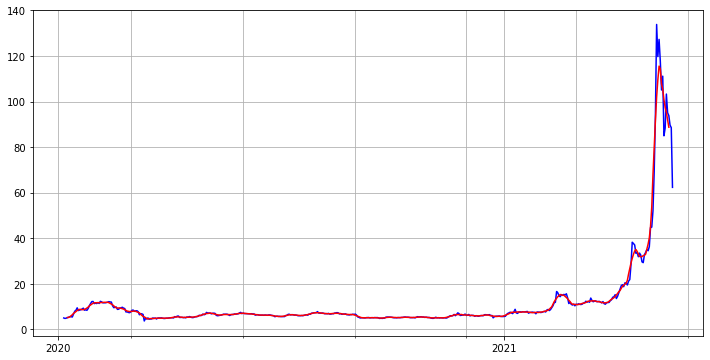

In [1]:
import ccxt
from datetime import datetime
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
import statsmodels.api as sm
from functools import reduce
from statsmodels.tsa.api import *
import progressbar
import warnings

def crypto(trading_pair, figs = False):
    warnings.filterwarnings("ignore")
    df = pd.DataFrame()
    try:
        okex = ccxt.okex()
        poloniex = ccxt.poloniex()

        # collect the candlestick data from Binance
        binance = ccxt.binance()
        # candles = binance.fetch_ohlcv(trading_pair, '1d', okex.parse8601('2017-11-08T00:00:00'), poloniex.parse8601(datetime.now().strftime("%d/%m/%Y %H:%M:%S")))
        candles = binance.fetch_ohlcv(trading_pair, '1d')
        dates = []
        open_data = []
        high_data = []
        low_data = []
        close_data = []
        for candle in candles:
            dates.append(datetime.fromtimestamp(candle[0] / 1000.0).strftime('%Y-%m-%d %H:%M:%S.%f'))
            open_data.append(candle[1])
            high_data.append(candle[2])
            low_data.append(candle[3])
            close_data.append(candle[4])

        crypto = pd.DataFrame({'Open Price': open_data, 'High Price': high_data,'Low Price': low_data,'Close': close_data}, index = dates)
        df = crypto[['Close']]
        df = df.set_index(pd.to_datetime(df.index))
        df = df.resample('D').mean()

        if figs:
            decomposition = sm.tsa.seasonal_decompose(df, model = 'Addictive') #'multiplicative'
            fig, ax = plt.subplots(figsize = (12, 6))
            ax.grid(True)
            year = mdates.YearLocator(month=1)
            month = mdates.MonthLocator(interval=3)
            year_format = mdates.DateFormatter('%Y')
            month_format = mdates.DateFormatter('%m')
            ax.xaxis.set_minor_locator(month)
            ax.xaxis.grid(True, which = 'minor')
            ax.xaxis.set_major_locator(year)
            ax.xaxis.set_major_formatter(year_format)
            plt.plot(df.index, df['Close'], c='blue')
            plt.plot(decomposition.trend.index, decomposition.trend, c='red')
    except:
       # handle all other exceptions
       pass
    return df

cr = crypto('ETC/USDT', figs = True).rename(columns={'Close':'ETC'})

In [2]:
crypto_list = pd.read_html('https://coinmarketcap.com/all/views/all/')[2].Symbol.loc[:50]

bar = progressbar.ProgressBar(maxval=len(crypto_list), widgets=[progressbar.Bar('>', '|', '| Obtaining Cryptos'), '...', progressbar.Percentage()])
bar.start()
bar_ = 0
for i in crypto_list:
    vars()[i] = crypto('{}/USDT'.format(i)).rename(columns={'Close':'{}'.format(i)})
    bar_ += 1
    bar.update(bar_)     
bar.finish()

dfs = []
for i in crypto_list:
    if len(vars()[i]) == 500:
        dfs.append(vars()[i])
df_final = reduce(lambda left, right: pd.merge(left, right, left_index = True, right_index = True), dfs)
df_final

|>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| Obtaining Cryptos...100%


,BTC,ETH,BNB,ADA,DOGE,XRP,USDC,BCH,MATIC,LTC,LINK,XLM,BUSD,ETC,VET
2020-01-06,7758.00,144.15,14.9471,0.03732,0.002134,0.22310,0.9999,244.25,0.01554,45.80,1.9374,0.05046,1.0001,5.0333,0.005730
2020-01-07,8145.28,142.80,15.0226,0.03700,0.002175,0.21335,0.9991,242.30,0.01509,46.30,2.1033,0.04839,0.9993,4.8344,0.005578
2020-01-08,8055.98,140.72,14.5334,0.03631,0.002089,0.20750,1.0010,240.19,0.01499,45.35,2.1892,0.04768,1.0009,4.9521,0.005492
2020-01-09,7817.76,137.74,14.3978,0.03616,0.002128,0.20373,1.0007,238.01,0.01459,44.74,2.1886,0.04718,1.0007,5.1848,0.005319
2020-01-10,8197.02,144.84,15.0700,0.03693,0.002197,0.21284,1.0008,271.83,0.01486,49.06,2.2257,0.04802,1.0005,5.3600,0.005454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-15,46762.99,3646.68,563.4100,2.17440,0.508550,1.49040,0.9997,1171.75,1.59501,300.30,41.4920,0.68081,0.9995,95.0880,0.172540
2021-05-16,46431.50,3582.10,564.3200,2.30020,0.513700,1.44960,0.9997,1166.69,1.72443,295.89,40.6700,0.71027,0.9995,93.8590,0.176460
2021-05-17,43538.04,3282.51,512.0700,2.03070,0.487500,1.49460,1.0000,1069.74,1.72678,281.53,37.1770,0.64323,0.9997,89.6770,0.157750
2021-05-18,42849.78,3375.07,507.8800,2.00360,0.475740,1.58890,0.9993,1089.32,2.44124,293.98,42.5660,0.64540,0.9993,88.5770,0.161830


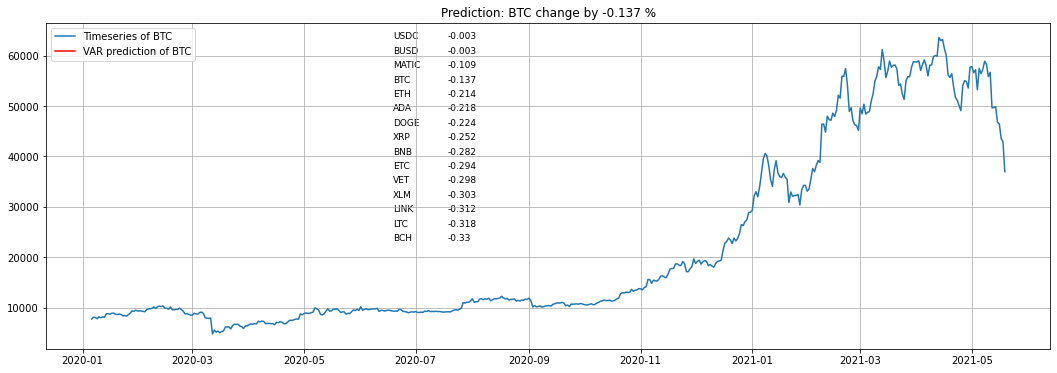

In [4]:
# SHORT VERSION
warnings.filterwarnings("ignore")

coin_req = 'BTC'
days_of_forecast = 1
data = df_final

model = VAR(data)
model_fit = model.fit()
pred = model_fit.forecast(model_fit.y, steps=days_of_forecast)

pred = pd.DataFrame(pred, columns = df_final.columns, index = (pd.Series(pd.date_range('today', periods=days_of_forecast, freq='D').normalize(), name='Date')).values)
pred.iloc[0] = df_final.iloc[-1]

merged = df_final.append(pred).resample('D').mean()
changes = pd.DataFrame(merged.pct_change(periods = days_of_forecast).iloc[-1].sort_values(ascending=False))
changes.columns = ['Change']

plt.figure(figsize = (18, 6))
plt.plot(df_final[coin_req], label = 'Timeseries of {}'.format(coin_req))
plt.plot(pred[coin_req], 'r', label = 'VAR prediction of {}'.format(coin_req))
plt.grid()
plt.legend()
plt.title('Prediction: {} change by {} %'.format(coin_req, round(float(changes.loc[coin_req].values), 3)))
table = plt.table(cellText=np.round(changes.values, 3), colWidths = [0.5] * len(changes.columns),
      rowLabels = changes.index, cellLoc = 'left', rowLoc = 'left', loc = 8, edges='open') # Adjust table size loc and allignment
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(.5, 1.2);

In [13]:
# # https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

# warnings.filterwarnings("ignore")

# coin_req = 'BTC'
# days_of_forecast = 2
# data = df_final

# model = VARMAX(data, order=(3, 0))
# model_fit = model.fit()
# pred = model_fit.forecast(steps=days_of_forecast)

# pred = pd.DataFrame(pred, columns = df_final.columns, index = (pd.Series(pd.date_range('today', periods=days_of_forecast, freq='D').normalize(), name='Date')).values)
# pred.iloc[0] = df_final.iloc[-1]

# merged = df_final.append(pred).resample('D').mean()
# changes = pd.DataFrame(merged.pct_change(periods = days_of_forecast).iloc[-1].sort_values(ascending=False))
# changes.columns = ['Change']

# plt.figure(figsize = (18, 6))
# plt.plot(df_final[coin_req], label = 'Timeseries of {}'.format(coin_req))
# plt.plot(pred[coin_req], 'r', label = 'VAR prediction of {}'.format(coin_req))
# plt.grid()
# plt.legend()
# plt.title('Prediction: {} change by {} %'.format(coin_req, round(float(changes.loc[coin_req].values), 3)))
# table = plt.table(cellText=np.round(changes.values, 3), colWidths = [0.5] * len(changes.columns),
#       rowLabels = changes.index, cellLoc = 'left', rowLoc = 'left', loc = 8, edges='open') # Adjust table size loc and allignment
# table.auto_set_font_size(False)
# table.set_fontsize(9)
# table.scale(.5, 1.2);